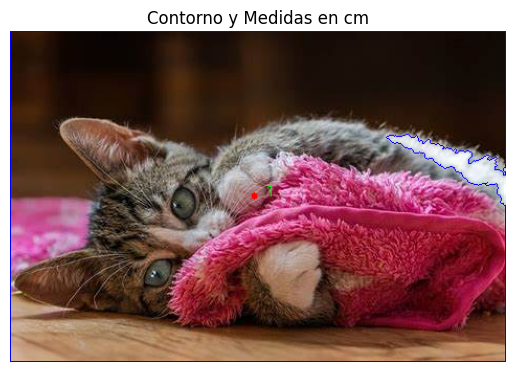

Objeto 1: Perímetro = 50.66 cm, Área = 102.85 cm²


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

pix_per_cm = 37.8

imagen = cv2.imread('image.jpg')
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
ret, bin = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
contorno, jerarquia = cv2.findContours(bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnt = contorno[0]
M = cv2.moments(cnt)

if M['m00'] != 0:
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
else:
    cx, cy = 0, 0

perimetro = cv2.arcLength(cnt, True)
area = cv2.contourArea(cnt)

perimetro_cm = perimetro / pix_per_cm
area_cm2 = area / (pix_per_cm ** 2)

cv2.circle(imagen, (cx, cy), 3, (0, 0, 255), -1)
cv2.putText(imagen, "1", (cx + 10, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
cv2.drawContours(imagen, [cnt], -1, (255, 0, 0), 1)

plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Contorno y Medidas en cm")
plt.axis('off')
plt.show()

print(f"Objeto 1: Perímetro = {perimetro_cm:.2f} cm, Área = {area_cm2:.2f} cm²")
